In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas pycountry matplotlib statsmodels fitter 
;

  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25589 sha256=e39aac7b2e3b1a979bd12d978816988f9fcd8d9944538ab0eb178f1d389b0624
  Stored in directory: /root/.cache/pip/wheels/0b/33/f5/e0b485be7b57f7209c0892050d029fbec76cf0e39dd9b5761c
Successfully built fitter


''

In [2]:
import json, pickle, pandas, datetime

with open("../data/ioda_kio_merged.json", "r") as f:
    master = json.load(f)
    
with open("../data/ioda.pkl", "rb") as f:
    ioda_df = pickle.load(f)
    
with open("../data/kio.pkl", "rb") as f:
    kio_df = pickle.load(f)

ioda_df.head()
ioda_df = ioda_df[(ioda_df['start_time'] >= datetime.datetime(2018,1,1)) & (ioda_df['start_time'] < datetime.datetime(2021,8,1))]
ioda_df['cause'] = ioda_df['cause'].astype(str)

In [3]:
import pytz
countries = [
    {'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
    {'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
    {'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
    {'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
    {'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
    {'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
    {'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
    {'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
    {'timezones': ['Australia/Sydney', 'Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
    {'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
    {'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
    {'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
    {'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
    {'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
    {'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
    {'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
    {'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
    {'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
    {'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
    {'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
    {'timezones': ['America/Sao_Paulo', 'America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
    {'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
    {'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
    {'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
    {'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
    {'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
    {'timezones': ['America/Toronto', 'America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
    {'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
    {'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
    {'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
    {'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
    {'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
    {'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
    {'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
    {'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
    {'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
    {'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
    {'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
    {'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
    {'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
    {'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
    {'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
    {'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
    {'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
    {'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
    {'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
    {'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
    {'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
    {'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
    {'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
    {'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
    {'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
    {'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
    {'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
    {'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
    {'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
    {'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
    {'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
    {'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
    {'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
    {'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
    {'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
    {'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
    {'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
    {'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
    {'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
    {'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
    {'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
    {'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
    {'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
    {'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
    {'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
    {'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
    {'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
    {'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
    {'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
    {'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
    {'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
    {'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
    {'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
    {'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
    {'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
    {'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
    {'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
    {'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
    {'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
    {'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
    {'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
    {'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
    {'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
    {'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
    {'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
    {'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
    {'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
    {'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
    {'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
    {'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
    {'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
    {'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
    {'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
    {'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
    {'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
    {'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
    {'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
    {'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
    {'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
    {'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
    {'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
    {'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
    {'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
    {'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
    {'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
    {'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
    {'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
    {'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
    {'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
    {'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
    {'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
    {'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
    {'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
    {'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
    {'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
    {'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
    {'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
    {'timezones': ['Europe/Moscow', 'Europe/Kaliningrad', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
    {'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
    {'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
    {'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
    {'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
    {'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
    {'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
    {'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
    {'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
    {'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
    {'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
    {'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
    {'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
    {'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
    {'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
    {'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
    {'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
    {'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
    {'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
    {'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
    {'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
    {'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
    {'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
    {'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
    {'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
    {'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
    {'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
    {'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kyiv'},
    {'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
    {'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
    {'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
    {'timezones': ['Asia/Tashkent', 'Asia/Samarkand'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
    {'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
    {'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
    {'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
    {'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
    {'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
    {'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
    {'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
    {'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
    {'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
    {'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
    {'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
    {'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
    {'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
    {'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
    {'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
    {'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
    {'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
    {'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
    {'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
    {'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
    {'timezones': ['Pacific/Ponape', 'Pacific/Truk', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
    {'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
    {'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
    {'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
    {'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
    {'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
    {'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
    {'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
    {'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
    {'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
    {'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
    {'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
    {'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
    {'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
    {'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
    {'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
    {'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
    {'timezones': ['Asia/Taipei'], 'code': 'TW', 'continent': 'Asia', 'name': 'Taiwan', 'capital' : 'Taipei'},
    {'timezones': ['Pacific/Guam'], 'code': 'MP', 'continent': 'Oceania', 'name': 'Northern Mariana Islands', 'capital' : 'Saipan'},
    {'timezones': ['Atlantic/Bermuda'], 'code': 'BM', 'continent': 'North America', 'name': 'Bermuda', 'capital' : 'Hamilton'},
    {'timezones': ['America/St_Kitts'], 'code': 'BQ', 'continent': 'North America', 'name': 'Caribbean Netherlands', 'capital' : 'Kralendijk'},
    {'timezones': ['America/St_Kitts'], 'code': 'CW', 'continent': 'South America', 'name': 'Curacao', 'capital' : 'Willemstad'},
    {'timezones': ['Europe/Gibraltar'], 'code': 'GI', 'continent': 'Europe', 'name': 'Gibraltar', 'capital' : 'Westside'},
    {'timezones': ['America/Nuuk'], 'code': 'GL', 'continent': 'North America', 'name': 'Greenland', 'capital' : 'Nuuk'},
    {'timezones': ['America/Port-au-Prince'], 'code': 'HT', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['Europe/Jersey'], 'code': 'JE', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['America/Marigot'], 'code': 'MF', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['Pacific/Noumea'], 'code': 'NC', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['America/Puerto_Rico'], 'code': 'PR', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['Asia/Gaza'], 'code': 'PS', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['Africa/Juba'], 'code': 'SS', 'continent': '', 'name': '', 'capital' : ''},
    {'timezones': ['America/Cayenne'], 'code' : 'GF', 'continent':'South America', 'name': '', 'capital':''},
    {'timezones': ['America/St_Kitts'], 'code' : 'AI', 'continent':'North America', 'name': '', 'capital':''},
    {'timezones': ['Pacific/Honolulu'], 'code' : 'CK', 'continent':'Oceania', 'name': 'Cook Islands', 'capital':''},
    {'timezones': ['America/St_Kitts'], 'code' : 'TC', 'continent':'North America', 'name': 'Turks and Caicos Islands', 'capital':''},
    {'timezones': ['Pacific/Honolulu'], 'code' : 'PF', 'continent':'Oceania', 'name': 'French Polynesia', 'capital':''},
    {'timezones': ['America/St_Kitts'], 'code' : 'AW', 'continent':'North America', 'name': 'Aruba', 'capital':''},
    {'timezones': ['EST'], 'code' : 'KY', 'continent':'North America', 'name': 'Cayman Islands', 'capital':''}, 
    {'timezones': ['Asia/Hong_Kong'], 'code' : 'HK', 'continent':'Asia', 'name': 'Hong Kong', 'capital':''}, 
    {'timezones': ['Asia/Dubai'], 'code' : 'RE', 'continent':'Africa', 'name': 'Réunion', 'capital':''}, 
    {'timezones': ['Atlantic/Faroe'], 'code' : 'FO', 'continent':'Europe', 'name': 'Faroe Island', 'capital':''},
    {'timezones': ['Europe/Guernsey'], 'code' : 'GG', 'continent':'Europe', 'name': 'Bailiwick of Guernsey', 'capital':''},
    {'timezones': ['Etc/GMT-4'], 'code' : 'MQ', 'continent':'North America', 'name': 'Martinique', 'capital':''},
    {'timezones': ['Etc/GMT+3'], 'code' : 'YT', 'continent':'Africa', 'name': 'Mayotte', 'capital':''},    
    
]
    # {'timezones': [''], 'code': '', 'continent': '', 'name': '', 'capital' : ''},
    # {'CW', 'GI', 'GL', 'HT', 'JE', 'MF', 'NC', None, 'PR', 'PS', 'SS'}
country_code_to_timezone = {d['code'] : d for d in countries}

def localize_ts(row):
    #[pytz.timezone(zones).localize(row['start_time']).hour for zones in country_code_to_timezone[row['country_code']]['timezones']]
    if row['country_code'] == None:
        return None
    else:
        return pytz.utc.localize(row['start_time']).astimezone(country_code_to_timezone[row['country_code']]['timezones'][0])

def localize_end_ts(row):
    #[pytz.timezone(zones).localize(row['start_time']).hour for zones in country_code_to_timezone[row['country_code']]['timezones']]
    if row['country_code'] == None or pandas.isnull(row['end_time']):
        return None
    else:
        return pytz.utc.localize(row['end_time']).astimezone(country_code_to_timezone[row['country_code']]['timezones'][0])

def local_start_hour(row):
    #[pytz.timezone(zones).localize(row['start_time']).hour for zones in country_code_to_timezone[row['country_code']]['timezones']]
    if row['country_code'] == None:
        return None
    else:
        return pytz.utc.localize(row['start_time']).astimezone(country_code_to_timezone[row['country_code']]['timezones'][0]).hour

def local_start_minute(row):
    #[pytz.timezone(zones).localize(row['start_time']).hour for zones in country_code_to_timezone[row['country_code']]['timezones']]
    if row['country_code'] == None:
        return None
    else:
        return pytz.utc.localize(row['start_time']).astimezone(country_code_to_timezone[row['country_code']]['timezones'][0]).minute
    
def local_start_day_of_week(row):
    #[pytz.timezone(zones).localize(row['start_time']).hour for zones in country_code_to_timezone[row['country_code']]['timezones']]
    if row['country_code'] == None:
        return None
    else:
        return pytz.utc.localize(row['start_time']).astimezone(country_code_to_timezone[row['country_code']]['timezones'][0]).weekday()
    
def kio_local_start_weekday(row):
    return row['start_date'].weekday()     

ioda_df['local_start_time'] = ioda_df.apply(localize_ts,axis=1)
ioda_df['local_end_time'] = ioda_df.apply(localize_end_ts,axis=1)
ioda_df['local_start_hour'] = ioda_df.apply(local_start_hour,axis=1)
ioda_df['local_start_minute'] = ioda_df.apply(local_start_minute,axis=1)
ioda_df['local_start_day_of_week'] = ioda_df.apply(local_start_day_of_week,axis=1)

kio_df['local_start_day_of_week'] = kio_df.apply(kio_local_start_weekday,axis=1)



In [4]:
ioda_df_duration = ioda_df[~ioda_df['end_time'].isna()]
ioda_df['duration'] = ioda_df[~ioda_df['end_time'].isna()]['end_time'] - ioda_df[~ioda_df['end_time'].isna()]['start_time']

ioda_outages = ioda_df[((ioda_df['kio_matches'].map(len) == 0) & ((ioda_df['cause'].isna()) | 
                                                                  ((~ioda_df['cause'].isna()) & ((~ioda_df['cause'].str.match("Government-Ordered"))
                                                                                                 & (~ioda_df['cause'].str.match("Exams"))))))
                       & (~(ioda_df['country_code'].isna()))]
ioda_shutdowns = ioda_df[((ioda_df['kio_matches'].map(len) > 0) | ((~ioda_df['cause'].isna()) & (ioda_df['cause'].str.match("Government-Ordered")
                                                                                                 | ioda_df['cause'].str.match("Exams"))))
                         & (~(ioda_df['country_code'].isna()))]

ioda_national_outages = ioda_outages[~ioda_outages['scope'].isna() & ioda_outages['scope'].str.match("Country")]
ioda_national_shutdowns = ioda_shutdowns[~ioda_shutdowns['scope'].isna() & ioda_shutdowns['scope'].str.match("Country")]

percentile	  Shutdowns  Outages
5 percentile (hours): 0.83 0.25
10 percentile (hours): 2.00 0.50
25 percentile (hours): 4.50 1.00
50 percentile (hours): 5.50 2.00
75 percentile (hours): 8.00 4.50
90 percentile (hours): 22.33 10.42
95 percentile (hours): 49.82 16.30
99 percentile (hours): 203.00 75.40


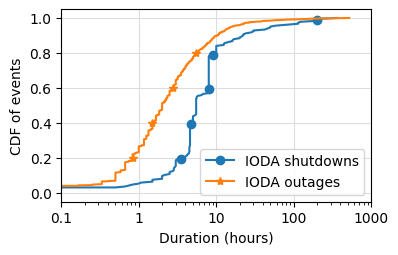

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

markers = itertools.cycle(['o', '*', "^", "s"])

from statsmodels.distributions.empirical_distribution import ECDF

percentiles = [5, 10, 25, 50, 75, 90, 95, 99]

def print_percentile(p, a, b):
    print("{} percentile (hours): {:.2f} {:.2f}".format(p, float(a[int(len(a) * p/100)])/60/60, float(b[int(len(b) * p/100)])/60/60))

markers = itertools.cycle(['o', '*', "^", "s"])
plt.figure(figsize=(4,2.5))
ioda_shutdowns_ecdf = ECDF(ioda_national_shutdowns[~ioda_national_shutdowns['duration'].isna()]['duration']/np.timedelta64(1, 's'))
plt.plot(ioda_shutdowns_ecdf.x/60/60,ioda_shutdowns_ecdf.y,label="IODA shutdowns",marker=next(markers),markevery = int(len(ioda_shutdowns_ecdf.x) / 5))
ioda_outages_ecdf = ECDF(ioda_national_outages['duration'][~ioda_national_outages['duration'].isna()]/ np.timedelta64(1, 's'))
plt.plot(ioda_outages_ecdf.x/60/60,ioda_outages_ecdf.y,label="IODA outages",marker=next(markers),markevery = int(len(ioda_outages_ecdf.x) / 5))
plt.xlabel("Duration (hours)")
plt.legend()
plt.xscale("log")
plt.xticks([.1, 1, 10, 100, 1000], [.1, 1, 10, 100, 1000])
plt.ylabel("CDF of events")
plt.grid(color='#DDDDDD')
plt.savefig("../figures/duration_national_cdf.pdf",bbox_inches="tight")

print("percentile\t  Shutdowns  Outages")
for p in percentiles:
    print_percentile(p, ioda_shutdowns_ecdf.x, ioda_outages_ecdf.x)

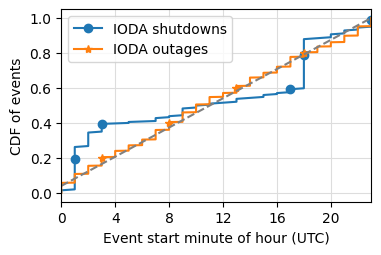

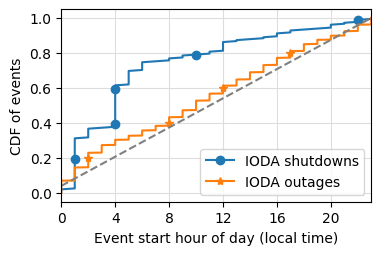

In [31]:
markers = itertools.cycle(['o', '*', "^", "s"])
min_ticks = [x for x in range(24) if x % 4 !=0]

shutdown_start_hours = ECDF(ioda_national_shutdowns.start_time.dt.hour)
outage_start_hours = ECDF(ioda_national_outages.start_time.dt.hour)

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_hours.x,shutdown_start_hours.y,label="IODA shutdowns",
        marker=next(markers),markevery = int(len(shutdown_start_hours.x) / 5))
plt.plot(outage_start_hours.x,outage_start_hours.y,label="IODA outages",
        marker=next(markers),markevery = int(len(outage_start_hours.x) / 5))
plt.plot([0,23],[1/24,1],ls="--",color="gray")
plt.legend()
plt.ylabel("CDF of events")
plt.xlabel("Event start minute of hour (UTC)")
plt.xlim(0,23)
plt.xticks(min_ticks)
plt.grid(color='#DDDDDD')
plt.xticks([0,4,8,12,16,20])

plt.savefig("../figures/start_time_utc_national_cdf.pdf",bbox_inches="tight")

markers = itertools.cycle(['o', '*', "^", "s"])

shutdown_start_hours_local = ECDF(ioda_national_shutdowns['local_start_hour'])
outage_start_hours_local = ECDF(ioda_national_outages['local_start_hour'])

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_hours_local.x,shutdown_start_hours.y,label="IODA shutdowns",
        marker=next(markers),markevery = int(len(shutdown_start_hours_local.x) / 5))
plt.plot(outage_start_hours_local.x,outage_start_hours.y,label="IODA outages",
        marker=next(markers),markevery = int(len(outage_start_hours_local.x) / 5))
plt.plot([0,23],[1/24,1],ls="--",color="gray")
plt.legend()
plt.ylabel("CDF of events")
plt.xlim(0,23)
plt.xticks(min_ticks)
plt.xticks([0,4,8,12,16,20])
plt.xlabel("Event start hour of day (local time)")
plt.grid(color='#DDDDDD')
plt.savefig("../figures/start_time_local_national_cdf.pdf",bbox_inches="tight")

# *0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

hour_counts = ioda_shutdowns['local_start_hour'].value_counts()

total = sum(hour_counts)

"""
hours_of_interest = [1.0, 4.0, 2.0, 12.0, 0]
for hour in hours_of_interest:
    print("Hour:",int(hour), "||",hour_counts[hour], "{:.2%}".format(hour_counts[hour]/total))
    print(ioda_shutdowns[ioda_shutdowns['local_start_hour'] == hour]['country_code'].value_counts())

print(scipy.stats.percentileofscore(ioda_shutdowns['local_start_hour'],4.01))
print(scipy.stats.percentileofscore(ioda_shutdowns['local_start_hour'],6.01))



hourly_counts = ioda_shutdowns['local_start_hour'].value_counts()
total = sum(hourly_counts)
print(hourly_counts[12.0]/total)
print(hourly_counts)
""";

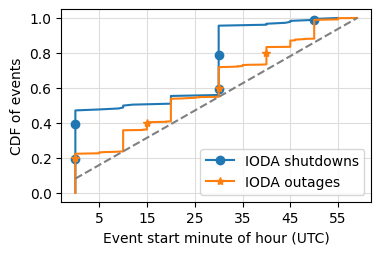

In [34]:
markers = itertools.cycle(['o', '*', "^", "s"])

"""
shutdown_start_minutes = ECDF(ioda_shutdowns.start_time.dt.minute)
outage_start_minutes = ECDF(ioda_outages.start_time.dt.minute)

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_minutes.x,shutdown_start_minutes.y,
         marker=next(markers),markevery = int(len(shutdown_start_minutes.x) / 5),label="IODA shutdowns")
plt.plot(outage_start_minutes.x,outage_start_minutes.y,
         marker=next(markers),markevery = int(len(outage_start_minutes.x) / 5),label="IODA outages")
plt.legend()
plt.ylabel("CDF of events")
plt.xlabel("Event start minute of hour (UTC)")
plt.grid(color='#DDDDDD')
plt.xticks([5,15,25,35,45,55],minor=True)
plt.plot([0,59],[1/12,1],ls="--",color="gray")
plt.savefig("plots/start_time_minute_utc_cdf.pdf",bbox_inches="tight")
"""

shutdown_start_minutes = ECDF(ioda_national_shutdowns.start_time.dt.minute)
outage_start_minutes = ECDF(ioda_national_outages.start_time.dt.minute)
markers = itertools.cycle(['o', '*', "^", "s"])

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_minutes.x,shutdown_start_minutes.y,
         marker=next(markers),markevery = int(len(shutdown_start_minutes.x) / 5),label="IODA shutdowns")
plt.plot(outage_start_minutes.x,outage_start_minutes.y,
         marker=next(markers),markevery = int(len(outage_start_minutes.x) / 5),label="IODA outages")
plt.legend()
plt.ylabel("CDF of events")
plt.xticks([5,15,25,35,45,55])
plt.xlabel("Event start minute of hour (UTC)")
plt.grid(color='#DDDDDD')
plt.plot([0,59],[1/12,1],ls="--",color="gray")
plt.savefig("../figures/start_time_minute_utc_national_cdf.pdf",bbox_inches="tight")

Outages on the hour: 23.056300268096514
Outages on the hour+half hour: 39.47721179624666
Shutdowns on the hour: 70.55837563451777
Shutdowns on the half hour: 14.21319796954316
Shutdowns on the hour+half hour: 84.77157360406095


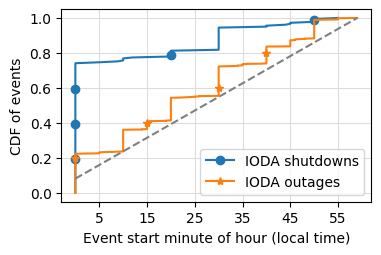

In [38]:
import scipy.stats


"""
# All events
markers = itertools.cycle(['o', '*', "^", "s"])
shutdown_start_minutes = ECDF(ioda_shutdowns['local_start_minute'])
outage_start_minutes = ECDF(ioda_outages['local_start_minute'])

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_minutes.x,shutdown_start_minutes.y,
         marker=next(markers),markevery = int(len(shutdown_start_minutes.x) / 5),label="IODA shutdowns")
plt.plot(outage_start_minutes.x,outage_start_minutes.y,
         marker=next(markers),markevery = int(len(outage_start_minutes.x) / 5),label="IODA outages")
plt.legend()
plt.plot([0,59],[1/12,1],ls="--",color="gray")
plt.ylabel("CDF of events")
plt.xlabel("Event start minute of hour (local time)")
plt.xticks([5,15,25,35,45,55],minor=True)
print("Outages on the hour:",scipy.stats.percentileofscore(ioda_outages['local_start_minute'],1))
print("Shutdowns on the hour:", scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],1))
print("Shutdowns on the half hour:", scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],31)
                                      -scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],29))
print("Shutdowns on the hour+half hour:",scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],1)+
                                          scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],31)
                                          -scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],29))
print("Outages on the hour+half hour:",scipy.stats.percentileofscore(ioda_outages['local_start_minute'],1)+
                                          scipy.stats.percentileofscore(ioda_outages['local_start_minute'],31)
                                          -scipy.stats.percentileofscore(ioda_outages['local_start_minute'],29))
plt.grid(color='#DDDDDD')
plt.savefig("plots/start_time_minute_local_cdf.pdf",bbox_inches="tight")
"""

# National events
markers = itertools.cycle(['o', '*', "^", "s"])

shutdown_start_minutes = ECDF(ioda_national_shutdowns['local_start_minute'])
outage_start_minutes = ECDF(ioda_national_outages['local_start_minute'])

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_minutes.x,shutdown_start_minutes.y,
         marker=next(markers),markevery = int(len(shutdown_start_minutes.x) / 5),label="IODA shutdowns")
plt.plot(outage_start_minutes.x,outage_start_minutes.y,
         marker=next(markers),markevery = int(len(outage_start_minutes.x) / 5),label="IODA outages")
plt.legend()
plt.plot([0,59],[1/12,1],ls="--",color="gray")
plt.ylabel("CDF of events")
plt.xlabel("Event start minute of hour (local time)")
plt.xticks([5,15,25,35,45,55])
print("Outages on the hour:",scipy.stats.percentileofscore(ioda_outages['local_start_minute'],1))
print("Outages on the hour+half hour:",scipy.stats.percentileofscore(ioda_outages['local_start_minute'],1)+
                                          scipy.stats.percentileofscore(ioda_outages['local_start_minute'],31)
                                          -scipy.stats.percentileofscore(ioda_outages['local_start_minute'],29))
print("Shutdowns on the hour:", scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],1))
print("Shutdowns on the half hour:", scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],31)
                                      -scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],29))
print("Shutdowns on the hour+half hour:",scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],1)+
                                          scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],31)
                                          -scipy.stats.percentileofscore(ioda_shutdowns['local_start_minute'],29))

plt.grid(color='#DDDDDD')
plt.savefig("../figures/start_time_minute_local_national_cdf.pdf",bbox_inches="tight")

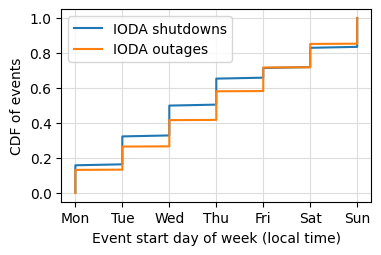

In [41]:
import calendar 

shutdown_start_minutes = ECDF(ioda_shutdowns['local_start_day_of_week'])
outage_start_minutes = ECDF(ioda_outages['local_start_day_of_week'])

"""
# All events
plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_minutes.x,shutdown_start_minutes.y,label="IODA shutdowns")
plt.plot(outage_start_minutes.x,outage_start_minutes.y,label="IODA outages")
plt.legend()
plt.xticks(range(7), [calendar.day_abbr[x] for x in range(7)])
plt.ylabel("CDF of events")
plt.xlabel("Event start day of week (local time)")
plt.grid(plt.grid(color='#DDDDDD'))
plt.savefig("plots/start_time_weekday_local_cdf.pdf",bbox_inches="tight")
"""

# National events
shutdown_start_minutes = ECDF(ioda_national_shutdowns['local_start_day_of_week'])
outage_start_minutes = ECDF(ioda_national_outages['local_start_day_of_week'])

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_start_minutes.x,shutdown_start_minutes.y,label="IODA shutdowns")
plt.plot(outage_start_minutes.x,outage_start_minutes.y,label="IODA outages")
plt.legend()
plt.xticks(range(7), [calendar.day_abbr[x] for x in range(7)])
plt.ylabel("CDF of events")
plt.xlabel("Event start day of week (local time)")
plt.grid(color='#DDDDDD')
plt.savefig("../figures/start_time_weekday_local_national_cdf.pdf",bbox_inches="tight")

Mon
	Shutdown: BinomTestResult(k=29, n=182, alternative='two-sided', proportion_estimate=0.15934065934065933, pvalue=0.5247108648585294)
	Outage: BinomTestResult(k=97, n=729, alternative='two-sided', proportion_estimate=0.13305898491083676, pvalue=0.491333668340046)
Tue
	Shutdown: BinomTestResult(k=30, n=182, alternative='two-sided', proportion_estimate=0.16483516483516483, pvalue=0.39641151913562067)
	Outage: BinomTestResult(k=97, n=729, alternative='two-sided', proportion_estimate=0.13305898491083676, pvalue=0.491333668340046)
Wed
	Shutdown: BinomTestResult(k=32, n=182, alternative='two-sided', proportion_estimate=0.17582417582417584, pvalue=0.2036412173562045)
	Outage: BinomTestResult(k=110, n=729, alternative='two-sided', proportion_estimate=0.15089163237311384, pvalue=0.5254693186293495)
Thu
	Shutdown: BinomTestResult(k=28, n=182, alternative='two-sided', proportion_estimate=0.15384615384615385, pvalue=0.6715065301589337)
	Outage: BinomTestResult(k=120, n=729, alternative='two-sid

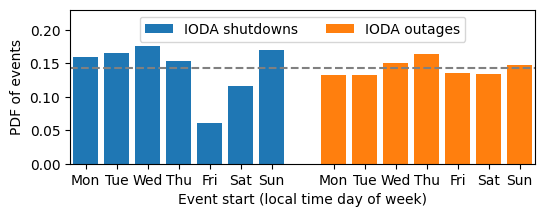

In [43]:
import numpy 
import calendar

"""
# All events
shutdown_weekdays = ioda_shutdowns['local_start_day_of_week'].value_counts()
outage_weekdays = ioda_outages['local_start_day_of_week'].value_counts()

weekdays = sorted(outage_weekdays.keys())

plt.figure(figsize=(6,2))
plt.plot([-.5,14.5],[1/7,1/7],ls="--",color="gray")
plt.bar(weekdays,[shutdown_weekdays[x]/sum(shutdown_weekdays.values) for x in weekdays],label="IODA shutdowns")
plt.bar(numpy.array(weekdays)+8,[outage_weekdays[x]/sum(outage_weekdays.values) for x in weekdays],label="IODA outages")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=2)
plt.xlim(-0.5,14.5)
plt.ylim(0,0.23)
plt.xticks(list(range(7))+list(range(8,15)), [calendar.day_abbr[x] for x in range(7)]+[calendar.day_abbr[x] for x in range(7)])
plt.ylabel("PDF of events")
plt.xlabel("Event start (local time day of week)")
plt.savefig("plots/start_time_weekday_local_bar.pdf",bbox_inches="tight")

shutdown_sum = sum(shutdown_weekdays.values)
outage_sum = sum(outage_weekdays.values)
for weekday in range(7):
    print(calendar.day_abbr[weekday])
    print("\tShutdown:",scipy.stats.binomtest(shutdown_weekdays[weekday],shutdown_sum,1/7,alternative='two-sided'))
    print("\tOutage:",scipy.stats.binomtest(outage_weekdays[weekday],outage_sum,1/7,alternative='two-sided'))
"""


# National events

shutdown_weekdays = ioda_national_shutdowns['local_start_day_of_week'].value_counts()
outage_weekdays = ioda_national_outages['local_start_day_of_week'].value_counts()

weekdays = sorted(outage_weekdays.keys())

plt.figure(figsize=(6,2))
plt.plot([-.5,14.5],[1/7,1/7],ls="--",color="gray")
plt.bar(weekdays,[shutdown_weekdays[x]/sum(shutdown_weekdays.values) for x in weekdays],label="IODA shutdowns")
plt.bar(numpy.array(weekdays)+8,[outage_weekdays[x]/sum(outage_weekdays.values) for x in weekdays],label="IODA outages")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=2)
plt.xlim(-0.5,14.5)
plt.ylim(0,0.23)
plt.xticks(list(range(7))+list(range(8,15)), [calendar.day_abbr[x] for x in range(7)]+[calendar.day_abbr[x] for x in range(7)])
plt.ylabel("PDF of events")
plt.xlabel("Event start (local time day of week)")
plt.savefig("../figures/start_time_weekday_local_national_bar.pdf",bbox_inches="tight")

shutdown_sum = sum(shutdown_weekdays.values)
outage_sum = sum(outage_weekdays.values)
for weekday in range(7):
    print(calendar.day_abbr[weekday])
    print("\tShutdown:",scipy.stats.binomtest(shutdown_weekdays[weekday],shutdown_sum,1/7,alternative='two-sided'))
    print("\tOutage:",scipy.stats.binomtest(outage_weekdays[weekday],outage_sum,1/7,alternative='two-sided'))


Shutdowns w/ all signals: 172 out of 182 (94.51%)
Outages w/ all signals: 393 out of 729 (53.91%)


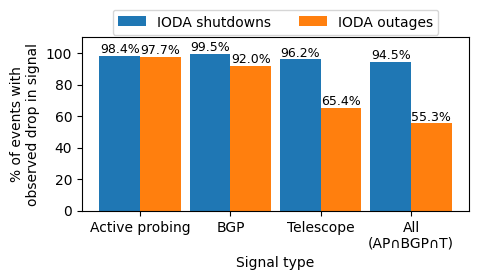

In [45]:

fields = ["ap_alert", "bgp_alert", "dn_alert"]
"""
alerts = ["Active probing", "BGP", "Telescope"]
ioda_shutdowns_signal_counts = [len(ioda_shutdowns[~ioda_shutdowns[x].isna() & ioda_shutdowns[x]])/len(ioda_shutdowns[~ioda_shutdowns[x].isna()]) for x in fields]
ioda_outages_signal_counts = [len(ioda_outages[~ioda_outages[x].isna() & ioda_outages[x]])/len(ioda_outages[~ioda_outages[x].isna()]) for x in fields]

alert_types = numpy.array(range(3))

plt.figure(figsize=(4.5,2.25))
bar1 = plt.bar(alert_types, numpy.array(ioda_shutdowns_signal_counts)*100, label="IODA shutdowns",width=.4)
bar2 = plt.bar(alert_types+0.4, numpy.array(ioda_outages_signal_counts)*100, label="IODA outages",width=.4)
plt.xticks(numpy.array(range(3))+.2, alerts)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=2)
plt.ylim(0,110)
plt.ylabel("Percent of events with\nobservable drop in signal")
plt.xlabel("Data source")
plt.bar_label(bar1, fmt="%.1f%%",label_type='edge')
plt.bar_label(bar2, fmt="%.1f%%",label_type='edge')
plt.savefig("plots/ioda_signal_source_bar.pdf",bbox_inches="tight")
"""

alerts = ["Active probing", "BGP", "Telescope", "All\n(AP∩BGP∩T)"]

ioda_shutdowns_signal_counts = [len(ioda_national_shutdowns[~ioda_national_shutdowns[x].isna() & ioda_national_shutdowns[x]])/len(ioda_national_shutdowns[~ioda_national_shutdowns[x].isna()]) for x in fields]
ioda_outages_signal_counts = [len(ioda_national_outages[~ioda_national_outages[x].isna() & ioda_national_outages[x]])/len(ioda_national_outages[~ioda_national_outages[x].isna()]) for x in fields]

shutdown_denom = len(ioda_national_shutdowns[(~ioda_national_shutdowns['ap_alert'].isna()) 
                                  & (~ioda_national_shutdowns['bgp_alert'].isna()) 
                                  & (~ioda_national_shutdowns['dn_alert'].isna())])
outage_denom = len(ioda_national_outages[(~ioda_national_outages['ap_alert'].isna()) 
                                  & (~ioda_national_outages['bgp_alert'].isna()) 
                                  & (~ioda_national_outages['dn_alert'].isna())])

shutdown_all_signal_count = len(ioda_national_shutdowns[((~ioda_national_shutdowns['ap_alert'].isna()) & ioda_national_shutdowns['ap_alert'])
                                  & ((~ioda_national_shutdowns['bgp_alert'].isna()) & ioda_national_shutdowns['bgp_alert'])
                                  & ((~ioda_national_shutdowns['dn_alert'].isna()) & ioda_national_shutdowns['dn_alert'])
                                 ])
outage_all_signal_count = len(ioda_national_outages[((~ioda_national_outages['ap_alert'].isna()) & ioda_national_outages['ap_alert'])
                                  & ((~ioda_national_outages['bgp_alert'].isna()) & ioda_national_outages['bgp_alert'])
                                  & ((~ioda_national_outages['dn_alert'].isna()) & ioda_national_outages['dn_alert'])
                                 ])

ioda_shutdowns_signal_counts.append(shutdown_all_signal_count/shutdown_denom)
ioda_outages_signal_counts.append(outage_all_signal_count/outage_denom)

alert_types = numpy.array(range(4))

plt.figure(figsize=(5,2.25))
bar1 = plt.bar(alert_types, numpy.array(ioda_shutdowns_signal_counts)*100, label="IODA shutdowns",width=.45)
bar2 = plt.bar(alert_types+0.45, numpy.array(ioda_outages_signal_counts)*100, label="IODA outages",width=.45)
plt.xticks(numpy.array(range(4))+.225, alerts)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=2)
plt.ylim(0,110)
plt.ylabel("% of events with\nobserved drop in signal")
plt.xlabel("Signal type")
plt.bar_label(bar1, fmt="%.1f%%",label_type='edge',fontsize=9)
plt.bar_label(bar2, fmt="%.1f%%",label_type='edge',fontsize=9)
plt.savefig("../figures/ioda_signal_source_national_bar.pdf",bbox_inches="tight")

shutdown_all_signal_count = len(ioda_national_shutdowns[((~ioda_national_shutdowns['ap_alert'].isna()) & ioda_national_shutdowns['ap_alert'])
                                  & ((~ioda_national_shutdowns['bgp_alert'].isna()) & ioda_national_shutdowns['bgp_alert'])
                                  & ((~ioda_national_shutdowns['dn_alert'].isna()) & ioda_national_shutdowns['dn_alert'])
                                 ])
outage_all_signal_count = len(ioda_national_outages[((~ioda_national_outages['ap_alert'].isna()) & ioda_national_outages['ap_alert'])
                                  & ((~ioda_national_outages['bgp_alert'].isna()) & ioda_national_outages['bgp_alert'])
                                  & ((~ioda_national_outages['dn_alert'].isna()) & ioda_national_outages['dn_alert'])
                                 ])
print("Shutdowns w/ all signals: {} out of {} ({:.2%})".format(
    shutdown_all_signal_count,len(ioda_national_shutdowns), shutdown_all_signal_count/len(ioda_national_shutdowns)))
print("Outages w/ all signals: {} out of {} ({:.2%})".format(
    outage_all_signal_count,len(ioda_national_outages), outage_all_signal_count/len(ioda_national_outages)))

Total number of countries w/ shutdowns: 24 | # of countries w/o recurrence: 12 (50.0%) | # w/ recurrence: 12 (50.0%)
Total number of countries w/ outages: 151 | # of countries w/o recurrence: 42 (27.8%) | # w/ recurrence: 109 (72.2%)

Shutdowns
Recur inteval 1 : 70 | 2 : 21 | 3 : 8 | 4 : 8 | Total : 107
Recur inteval 1 : 44.30% | 2 : 13.29% | 3 : 5.06% | 4 : 5.06% | Total : 67.72%
Total recurrences: 158

Outages
Recur inteval 1 : 0 | 2 : 0 | 3 : 0 | 4 : 1 | Total : 1
Recur inteval 1 : 0.00% | 2 : 0.00% | 3 : 0.00% | 4 : 0.17% | Total : 0.17%
Total recurrences: 574


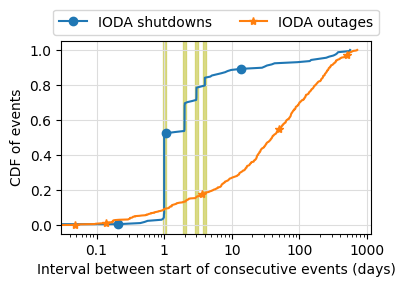

In [48]:
def summarize_outage_recurrence(outages):
    single_outage_cc = set()
    deltas = []
    for cc in outages['country_code'].unique():
        start_times = sorted(outages[outages['country_code'].str.match(cc) & ~outages['scope'].isna() & outages['scope'].str.match("Country")]['start_time'])
        if len(start_times) == 1:
            single_outage_cc.add(cc)
        else:
            for cur, nex in zip(start_times[:-1],start_times[1:]):
                diff = nex-cur
                if diff.total_seconds() == 0:
                    continue
                deltas.append(diff)
    total_count = len(outages['country_code'].unique())
    no_recur_count = len(single_outage_cc)
    recur_count = total_count - no_recur_count
    recurrence_intervals = deltas
    return total_count, no_recur_count, recur_count, recurrence_intervals

shutdown_total_count, shutdown_no_recur_count, shutdown_recur_count, shutdown_recurrence_intervals = summarize_outage_recurrence(ioda_national_shutdowns)

outage_total_count, outage_no_recur_count, outage_recur_count, outage_recurrence_intervals = summarize_outage_recurrence(ioda_national_outages)

print("Total number of countries w/ shutdowns:", shutdown_total_count, 
      "| # of countries w/o recurrence:",shutdown_no_recur_count, "({:.1%})".format(shutdown_no_recur_count/shutdown_total_count),
      "| # w/ recurrence:",shutdown_recur_count, "({:.1%})".format(shutdown_recur_count/shutdown_total_count),)
print("Total number of countries w/ outages:", outage_total_count, 
      "| # of countries w/o recurrence:",outage_no_recur_count, "({:.1%})".format(outage_no_recur_count/outage_total_count),
      "| # w/ recurrence:",outage_recur_count, "({:.1%})".format(outage_recur_count/outage_total_count),)


shutdown_intervals = ECDF([x.total_seconds()/60/60/24 for x in shutdown_recurrence_intervals])
outage_intervals = ECDF([x.total_seconds()/60/60/24 for x in outage_recurrence_intervals])

markers = itertools.cycle(['o', '*', "^", "s"])

plt.figure(figsize=(4,2.5))
plt.plot(shutdown_intervals.x,shutdown_intervals.y,label="IODA shutdowns",
        marker=next(markers),markevery = 0.35)
plt.plot(outage_intervals.x,outage_intervals.y,label="IODA outages",
        marker=next(markers),markevery =0.3)
plt.legend()
plt.xscale("log")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=2)
plt.xticks([.1, 1, 10, 100, 1000], ["0.1", "1", "10", "100", "1000"])
plt.axvspan(.95, 1.05, color='tab:olive', alpha=0.5)
plt.axvspan(1.9, 2.1, color='tab:olive', alpha=0.5)
plt.axvspan(2.88, 3.12, color='tab:olive', alpha=0.5)
plt.axvspan(3.80, 4.2, color='tab:olive', alpha=0.5)
plt.ylabel("CDF of events")
plt.grid(color='#DDDDDD')
plt.xlabel("Interval between start of consecutive events (days)")
plt.savefig("../figures/ioda_recurrence_cdf_national_log.pdf",bbox_inches="tight")

"""
plt.figure(figsize=(4,2.5))
plt.plot(shutdown_intervals.x,shutdown_intervals.y,label="IODA shutdowns")
plt.plot(outage_intervals.x,outage_intervals.y,label="IODA outages")
plt.legend()
#plt.xscale("log")
plt.ylabel("CDF of events")
plt.xlabel("Time between events (days)")

plt.savefig("../figures/ioda_recurrence_cdf_national.pdf",bbox_inches="tight")
"""

recur1 = len([x for x in shutdown_recurrence_intervals if x == datetime.timedelta(days=1)])
recur2 = len([x for x in shutdown_recurrence_intervals if x == datetime.timedelta(days=2)])
recur3 = len([x for x in shutdown_recurrence_intervals if x == datetime.timedelta(days=3)])
recur4 = len([x for x in shutdown_recurrence_intervals if x == datetime.timedelta(days=4)])

print("\nShutdowns")
print("Recur inteval 1 : {} | 2 : {} | 3 : {} | 4 : {} | Total : {}".format(recur1,recur2, recur3,recur4,sum([recur1,recur2, recur3,recur4])))
print("Recur inteval 1 : {:.2%} | 2 : {:.2%} | 3 : {:.2%} | 4 : {:.2%} | Total : {:.2%}".format(
    recur1/len(shutdown_recurrence_intervals),recur2/len(shutdown_recurrence_intervals), 
    recur3/len(shutdown_recurrence_intervals),recur4/len(shutdown_recurrence_intervals),
    sum([recur1,recur2, recur3,recur4])/len(shutdown_recurrence_intervals)))
print("Total recurrences:",len(shutdown_recurrence_intervals))

recur1 = len([x for x in outage_recurrence_intervals if x == datetime.timedelta(days=1)])
recur2 = len([x for x in outage_recurrence_intervals if x == datetime.timedelta(days=2)])
recur3 = len([x for x in outage_recurrence_intervals if x == datetime.timedelta(days=3)])
recur4 = len([x for x in outage_recurrence_intervals if x == datetime.timedelta(days=4)])

print("\nOutages")
print("Recur inteval 1 : {} | 2 : {} | 3 : {} | 4 : {} | Total : {}".format(recur1,recur2, recur3,recur4,sum([recur1,recur2, recur3,recur4])))
print("Recur inteval 1 : {:.2%} | 2 : {:.2%} | 3 : {:.2%} | 4 : {:.2%} | Total : {:.2%}".format(
    recur1/len(shutdown_recurrence_intervals),recur2/len(outage_recurrence_intervals), 
    recur3/len(shutdown_recurrence_intervals),recur4/len(outage_recurrence_intervals),
    sum([recur1,recur2, recur3,recur4])/len(outage_recurrence_intervals)))
print("Total recurrences:",len(outage_recurrence_intervals))

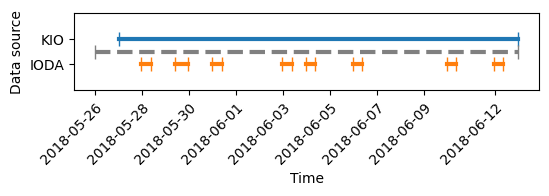

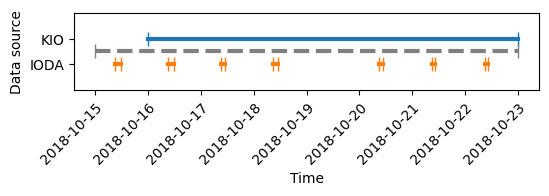

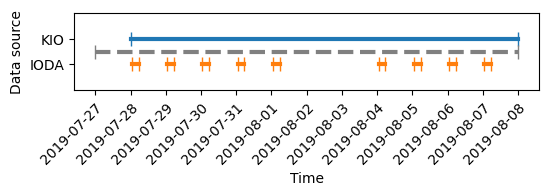

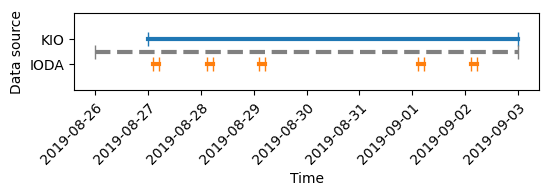

In [56]:
def summarize_match(kio_row):
    ioda_matches = kio_df.loc[kio_df.index[kio_row]]['ioda_matches']
    kio_start = kio_df.loc[kio_df.index[kio_row]]['start_date']
    kio_end = kio_df.loc[kio_df.index[kio_row]]['end_date']
    #print("KIO start:", kio_start, "KIO end:", kio_end)
    ioda_starts = []
    ioda_ends = []
    for match in ioda_matches:
        row = ioda_df.loc[ioda_df.index[match]]
        ioda_starts.append(row['local_start_time'])
        ioda_ends.append(row['local_end_time'])
        #print("Start:",row['local_start_time'],"End:",row['local_end_time'])
    return kio_start, kio_end, ioda_starts, ioda_ends

#kio_ids = [265, 540, 553, 572, 690, 812, 822]
#kio_ids = [265, 343, 499, 540, 553, 572, 690, 769, 784, 792, 812, 822]
kio_ids = [265, 343, 540, 553]
kio_id_xticks = {265 : pandas.date_range('2018-05-26', '2018-06-12',9),
                 343 : pandas.date_range('2018-10-15', '2018-10-23',9),
                 540 : pandas.date_range('2019-07-27', '2019-08-08',13),
                 553 : pandas.date_range('2019-08-26', '2019-09-03',9)}

for kio_id in kio_ids:
    kio_start, kio_end, ioda_starts, ioda_ends = summarize_match(kio_id)
    
    plt.figure(figsize=(6,1))
    plt.xlabel("Time")
    plt.ylabel("Data source")
    plt.plot([kio_start, kio_end+datetime.timedelta(days=1)], [2,2], marker="|",lw=3,markersize=10)
    plt.plot([kio_start-datetime.timedelta(days=1), kio_end+datetime.timedelta(days=1)], [1.5,1.5], marker="|",color="gray",ls="--",lw=3,markersize=10)
    for start, end in zip(ioda_starts, ioda_ends):
        plt.plot([start,end], [1,1], marker="|",lw=3,markersize=10, color="tab:orange")
        #print(start,end)
        plt.ylim(0,3)
    plt.yticks([1,2], ["IODA", "KIO"])
    if kio_id in kio_id_xticks:
        xticks = kio_id_xticks[kio_id]
        xticks = xticks.strftime('%Y-%m-%d')
        plt.xticks(xticks,xticks,rotation=45,horizontalalignment="right",rotation_mode="anchor",verticalalignment="top")
    else:
        plt.xticks(rotation=45,horizontalalignment="right",rotation_mode="anchor",verticalalignment="top")
    plt.savefig("../figures/timeline_"+str(kio_id)+"_"+kio_df.loc[kio_df.index[kio_id]]['country_code']+".pdf",bbox_inches="tight")

    

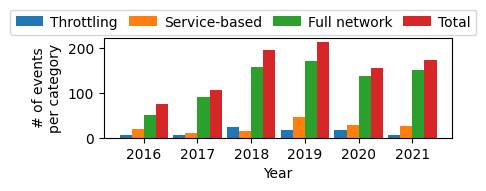

In [59]:
from collections import defaultdict
import numpy

substitutions = {"national" : "National",
                 "regional" : "Regional",
                 "local" : "Local",
                 "broadband_affected" : "Broadband affected",
                 "mobile_affected" : "Mobile affected",
                 "full_network_shutdown" : "Full network",
                 "service_based" : "Service-based",
                 "throttling" : "Throttling"}

shutdown_types = ["throttling", "service_based", "full_network_shutdown"]
years = [2016, 2017, 2018, 2019, 2020, 2021]


bars = dict()
for shutdown_type in shutdown_types:
    vals = []
    for year in years:
        count = len(kio_df[(kio_df['start_date'] >= datetime.datetime(year,1,1)) 
                           & (kio_df['start_date'] < datetime.datetime(year+1,1,1))
                           & kio_df[shutdown_type]])
        vals.append(count)
    bars[shutdown_type] = vals

vals = []
for year in years:
    count = len(kio_df[(kio_df['start_date'] >= datetime.datetime(year,1,1)) 
                       & (kio_df['start_date'] < datetime.datetime(year+1,1,1))])
    vals.append(count)
bars["Total"] = vals

total = 0.9
total_count = 4

plt.figure(figsize=(4.5,1.3))

for i, bar in enumerate(bars):
    if bar in substitutions:
        label = substitutions[bar]
    else:
        label = bar
    plt.bar(numpy.array(range(len(years)))+(i-1.5)*total/total_count,bars[bar],width=total/total_count, label=label)

plt.legend(loc='upper center', bbox_to_anchor=(1.22, 1),
          ncol=1,columnspacing=0.8,handletextpad=0.5)
plt.ylabel("# of events\nper category")
plt.xticks(numpy.array(range(len(years))), years)
plt.xlabel("Year")
#plt.savefig("../figures/kio_timeline_summary_legend-stack.pdf",bbox_inches="tight")

plt.legend(loc='upper center', bbox_to_anchor=(.4, 1.35),
          ncol=4,columnspacing=0.8,handletextpad=0.5)
plt.savefig("../figures/kio_timeline_summary_legend-row.pdf",bbox_inches="tight")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b9a2535-ed0e-48ec-8277-3dc0993a1e10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>